# EQUITY DIGITAL OPTION CASH-OR-NOTHING OPTION

Valuation and Risk of Equity Digital Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 22:17 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



# Cash-or-Nothing Digital Option

I define a digital call and a digital put option.

In [3]:
underlying_type = FinDigitalOptionTypes.CASH_OR_NOTHING

In [4]:
expiry_date = Date(1, 10, 2008)

In [5]:
strike_price = 90.0

In [6]:
digitalCall = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL, underlying_type)

In [7]:
digitalPut = EquityDigitalOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT, underlying_type)

In [8]:
print(digitalCall)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-OCT-2008
BARRIER LEVEL: 90.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL
UNDERLYING TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


In [9]:
print(digitalPut)

OBJECT TYPE: EquityDigitalOption
EXPIRY DATE: 01-OCT-2008
BARRIER LEVEL: 90.0
OPTION TYPE: OptionTypes.EUROPEAN_PUT
UNDERLYING TYPE: FinDigitalOptionTypes.CASH_OR_NOTHING


## Valuation

In [10]:
valuation_date = Date(1, 1, 2008)

In [11]:
interest_rate = 0.045

In [12]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [13]:
volatility = 0.25

In [14]:
model = BlackScholes(volatility)

In [15]:
stock_price = 110.0
dividend_yield = 0.045

In [16]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

In [17]:
digitalCall.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.76707743371463

In [18]:
digitalPut.value(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.19979518107018837

## Check Monte-Carlo

In [19]:
digitalCall.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.7696789449994546

In [20]:
digitalPut.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.1971936697853637

## Vectorisations

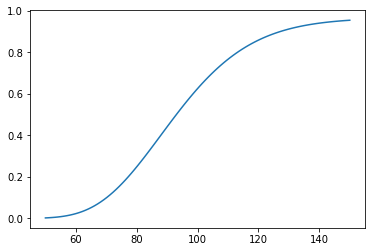

In [21]:
stock_prices = np.linspace(50,150,100)
v = digitalCall.value(valuation_date, stock_prices, discount_curve, dividend_curve, model)
plt.plot(stock_prices, v);

We can vectorise two things at the same time as long as they have the same length

## Risk Analysis

The analytical model produced the following sensitivities

In [23]:
digitalCall.delta(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.011584328476477168

In [24]:
digitalCall.gamma(valuation_date, stock_price, discount_curve, dividend_curve, model)

-0.0005031197680693822

In [25]:
digitalCall.theta(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.16779438072457908

In [26]:
digitalCall.vega(valuation_date, stock_price, discount_curve, dividend_curve, model)

-1.1421987802584521

In [27]:
digitalCall.rho(valuation_date, stock_price, discount_curve, dividend_curve, model)

0.37952340999347633

Copyright (c) 2020 Dominic O'Kane